# Chess Game Dynamics: An Exploratory Data Analysis

### Project Overview

This project performs an exploratory data analysis (EDA) on a dataset of chess games played on Lichess. The goal is to uncover key factors that influence the outcome of a chess game, such as first-move advantage, player skill, and strategic opening choices. The analysis uses Python with pandas for data manipulation and seaborn for visualization, as well as SQL for data querying and aggregation.

### Dataset

* **Source**: [Chess Game Dataset (Lichess)](https://www.kaggle.com/datasets/datasnaek/chess) on Kaggle.
* **Content**: The dataset contains over 20,000 chess games, with detailed information including player ELO ratings, opening names, number of turns, and the final outcome of each game.


## 1. Data Loading and Cleaning

In [1]:
# Importing the necessary libraries
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Reading the files
chessdb = pd.read_csv("games.csv")

In [3]:
chessdb.head()

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5


In [4]:
chessdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20058 entries, 0 to 20057
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              20058 non-null  object 
 1   rated           20058 non-null  bool   
 2   created_at      20058 non-null  float64
 3   last_move_at    20058 non-null  float64
 4   turns           20058 non-null  int64  
 5   victory_status  20058 non-null  object 
 6   winner          20058 non-null  object 
 7   increment_code  20058 non-null  object 
 8   white_id        20058 non-null  object 
 9   white_rating    20058 non-null  int64  
 10  black_id        20058 non-null  object 
 11  black_rating    20058 non-null  int64  
 12  moves           20058 non-null  object 
 13  opening_eco     20058 non-null  object 
 14  opening_name    20058 non-null  object 
 15  opening_ply     20058 non-null  int64  
dtypes: bool(1), float64(2), int64(4), object(9)
memory usage: 2.3+ MB


In [5]:
chessdb.describe()

,created_at,last_move_at,turns,white_rating,black_rating,opening_ply
count,2.005800e+04,2.005800e+04,20058.000000,20058.000000,20058.000000,20058.000000
mean,1.483617e+12,1.483618e+12,60.465999,1596.631868,1588.831987,4.816981
std,2.850151e+10,2.850140e+10,33.570585,291.253376,291.036126,2.797152
min,1.376772e+12,1.376772e+12,1.000000,784.000000,789.000000,1.000000
25%,1.477548e+12,1.477548e+12,37.000000,1398.000000,1391.000000,3.000000
50%,1.496010e+12,1.496010e+12,55.000000,1567.000000,1562.000000,4.000000
75%,1.503170e+12,1.503170e+12,79.000000,1793.000000,1784.000000,6.000000
max,1.504493e+12,1.504494e+12,349.000000,2700.000000,2723.000000,28.000000


In [6]:
# Checking the missing values
missing_values = pd.isnull(chessdb)
missing_counts = missing_values.sum()
print(missing_counts)

id                0
rated             0
created_at        0
last_move_at      0
turns             0
victory_status    0
winner            0
increment_code    0
white_id          0
white_rating      0
black_id          0
black_rating      0
moves             0
opening_eco       0
opening_name      0
opening_ply       0
dtype: int64


In [7]:
#Create a new feature that calculates difference in rating between white and black player
chessdb['ratingdiff'] = chessdb['white_rating'] - chessdb['black_rating']

In [8]:
chessdb.info()
chessdb.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20058 entries, 0 to 20057
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              20058 non-null  object 
 1   rated           20058 non-null  bool   
 2   created_at      20058 non-null  float64
 3   last_move_at    20058 non-null  float64
 4   turns           20058 non-null  int64  
 5   victory_status  20058 non-null  object 
 6   winner          20058 non-null  object 
 7   increment_code  20058 non-null  object 
 8   white_id        20058 non-null  object 
 9   white_rating    20058 non-null  int64  
 10  black_id        20058 non-null  object 
 11  black_rating    20058 non-null  int64  
 12  moves           20058 non-null  object 
 13  opening_eco     20058 non-null  object 
 14  opening_name    20058 non-null  object 
 15  opening_ply     20058 non-null  int64  
 16  ratingdiff      20058 non-null  int64  
dtypes: bool(1), float64(2), int64(5

(20058, 17)

In [9]:
# These rows does not seem relevant for our metrics since they were cancelled, so we can delete them
columns_to_drop = ['id', 'created_at', 'last_move_at', 'increment_code', 'white_id', 'black_id', 'opening_ply']
chessdb = chessdb.drop([columns_to_drop], axis=1, errors='ignore')
chessdb.shape

(20058, 17)

## 2. Does White Have a First-Move Advantage?

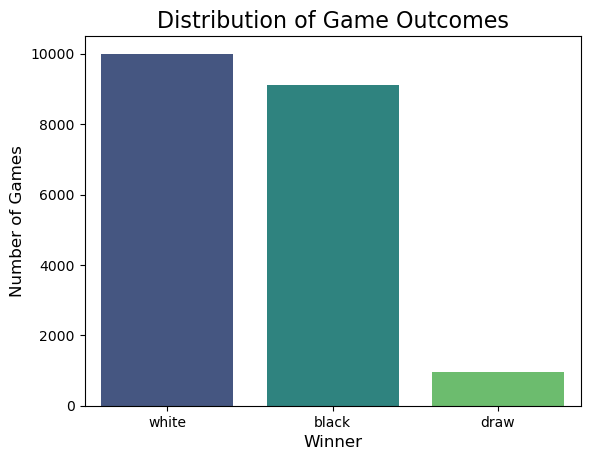

In [10]:
#Barplot of all winners in the database including CI calculation to understand if there is significant difference between game outcomes and color
sns.countplot(x='winner', data=chessdb, palette='viridis', order=chessdb['winner'].value_counts().index)
plt.title('Distribution of Game Outcomes', fontsize=16)
plt.xlabel('Winner', fontsize=12)
plt.ylabel('Number of Games', fontsize=12)
plt.show()

White seems to have a tangible advantage in terms of decisive results. Next, I wanted to test if White's first-move advantage is statistically significant. I filtered out draws and calculated the 95% confidence interval for the win proportions.

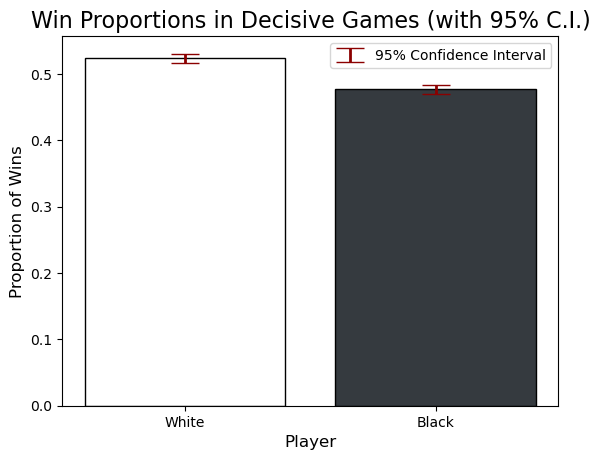

In [11]:
chessdb['winner'] = chessdb['winner'].astype('string')
 # Standardize the 'winner' column. This converts 'white' to 'White', 'black' to 'Black' so I don't need to keep checking the rest of the code
chessdb['winner'] = chessdb['winner'].astype('string').str.strip().str.title()

# Filter for decisive games 
decisive_games = chessdb[chessdb['winner'].isin(['White', 'Black'])]
#print(decisive_games)
if not decisive_games.empty:
    win_counts = decisive_games['winner'].value_counts()
    n_white = win_counts.get('White', 0)
    n_black = win_counts.get('Black', 0)
    n_total = n_white + n_black

#Calculate proportion and 95% CI
prop_white = n_white / n_total
error_white = 1.96 * np.sqrt(prop_white * (1 - prop_white) / n_total)
prop_black = n_black / n_total
error_black = 1.96 * np.sqrt(prop_black * (1 - prop_black) / n_total)

# Prepare barplots with error bars
colors = ['White', 'Black']
proportions = [prop_white, prop_black]
errors = [error_white, error_black]
sns.barplot(x=colors, y=proportions, palette=['#FFFFFF', '#343a40'], ec='black')
plt.errorbar(x=colors, y=proportions, yerr=errors,fmt='none', c='darkred', capsize=10, linewidth=2, label='95% Confidence Interval')
plt.title('Win Proportions in Decisive Games (with 95% C.I.)', fontsize=16)
plt.xlabel('Player', fontsize=12)
plt.ylabel('Proportion of Wins', fontsize=12)
plt.legend()
plt.show()

Since error bars don't overlap, we can say that win has a significant advantage in terms of decisive results with a 95% CI in this dataset.

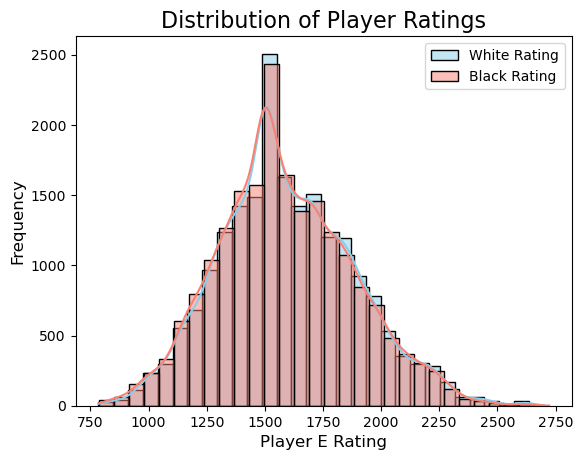

In [12]:
#Histogram of player ratings
sns.histplot(chessdb['white_rating'], color='skyblue', kde=True, label='White Rating', bins=30)
sns.histplot(chessdb['black_rating'], color='salmon', kde=True, label='Black Rating', bins=30)
plt.title('Distribution of Player Ratings', fontsize=16)
plt.xlabel('Player E Rating', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()
plt.show()

The two histograms have nearly the same shape, center, and spread. The ELO ratings for players assigned White and Black are identically distributed. Advantage is not because White players are stronger. The advantage must come from the well-known "first-move advantage". 

In [13]:
## 3. The Impact of Player Skill

To see how player skill impacts the game, I used the new feature I created above called 'ratingdiff' and visualized its distribution for each game outcome

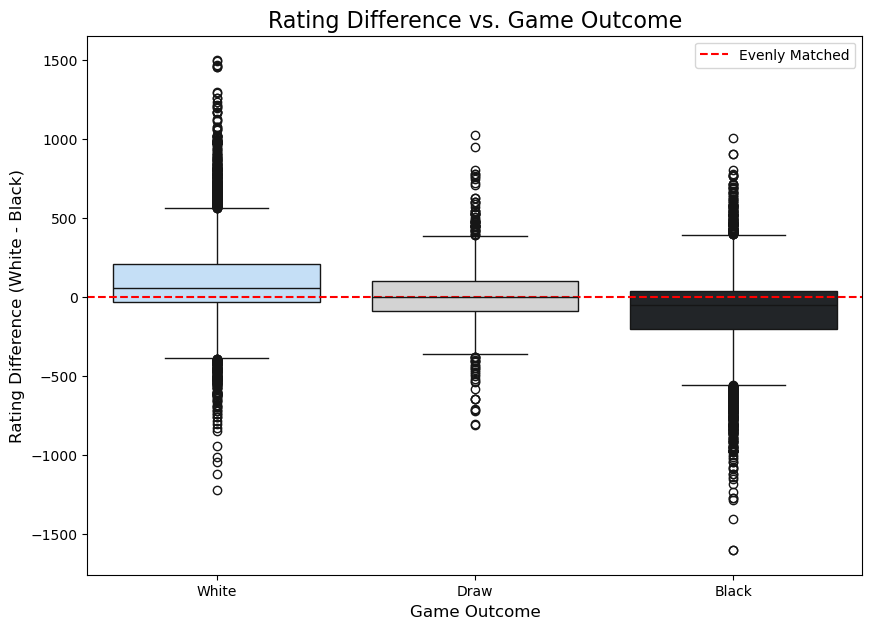

In [14]:
# Calculate if higher-rated players win more often. Visualized using Box plot & Violin plot

plt.figure(figsize=(10, 7))
sns.boxplot(x='winner', y='ratingdiff', data=chessdb, order=['White', 'Draw', 'Black'], palette=['#BDE0FE', 'lightgrey', '#212529'])
plt.axhline(0, color='red', linestyle='--', label='Evenly Matched')
plt.title('Rating Difference vs. Game Outcome', fontsize=16)
plt.xlabel('Game Outcome', fontsize=12)
plt.ylabel('Rating Difference (White - Black)', fontsize=12)
plt.legend()
plt.show()


Player Skill is the Overwhelming Predictor of a Win. Higher-rated player wins most of the time.'White' wins are almost all above the red line, and 'Black' wins are below it.

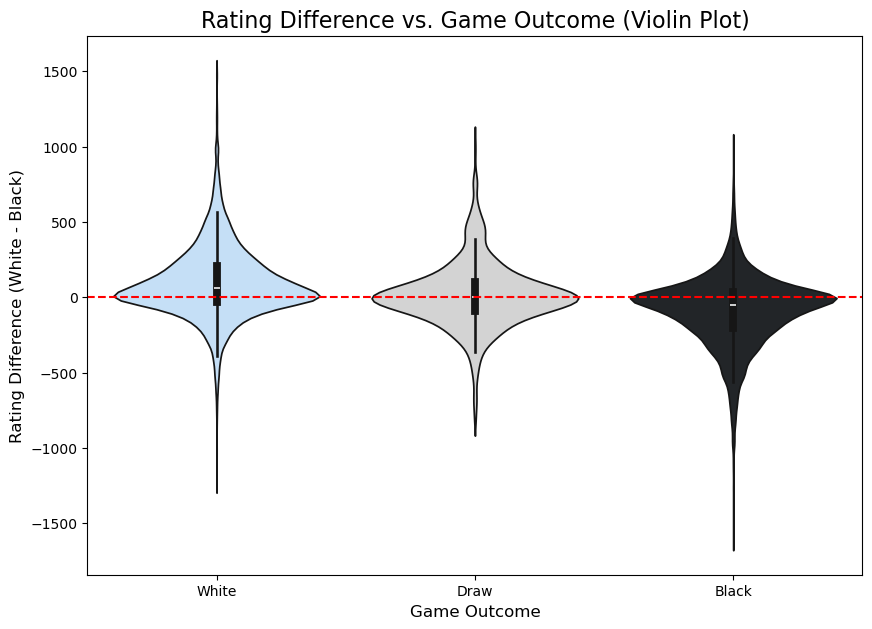

In [15]:
# Representing the above result using a Violin plot
plt.figure(figsize=(10, 7))
sns.violinplot(x='winner', y='ratingdiff', data=chessdb, order=['White', 'Draw', 'Black'],palette=['#BDE0FE', 'lightgrey', '#212529'])
plt.axhline(0, color='red', linestyle='--')
plt.title('Rating Difference vs. Game Outcome (Violin Plot)', fontsize=16)
plt.xlabel('Game Outcome', fontsize=12)
plt.ylabel('Rating Difference (White - Black)', fontsize=12)
plt.show()

In [16]:
# Identify 10 most frequently played openings as well as the win rate with the most popular opening

top_openings = chessdb['opening_name'].value_counts().head(10)
print(top_openings)
most_popular_opening = top_openings.index[0]
games_with_top_opening = chessdb[chessdb['opening_name'] == most_popular_opening]

opening_name
Van't Kruijs Opening                             368
Sicilian Defense                                 358
Sicilian Defense: Bowdler Attack                 296
French Defense: Knight Variation                 271
Scotch Game                                      271
Scandinavian Defense: Mieses-Kotroc Variation    259
Queen's Pawn Game: Mason Attack                  232
Queen's Pawn Game: Chigorin Variation            229
Scandinavian Defense                             223
Horwitz Defense                                  209
Name: count, dtype: int64


## 4. Analysis of Opening Strategies

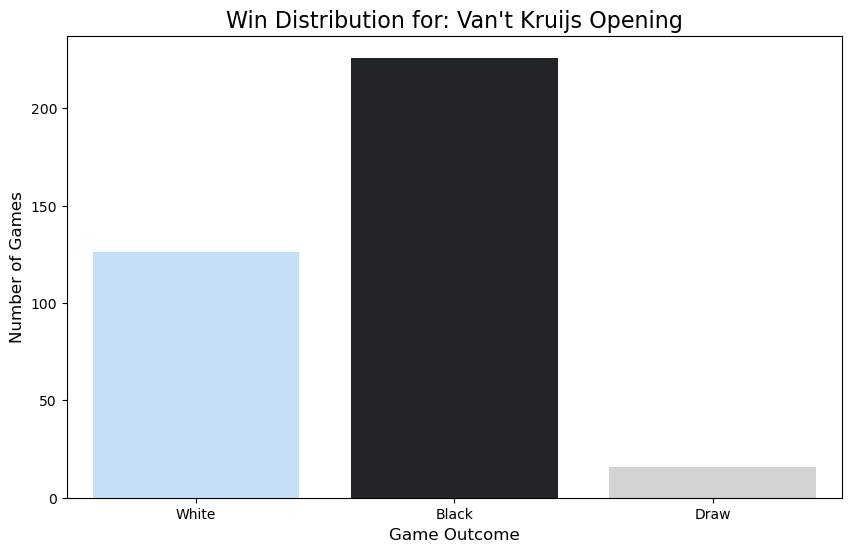

In [17]:
#Visualize win rate for most popular opening
plt.figure(figsize=(10, 6))
sns.countplot(x='winner', data=games_with_top_opening, palette={'White': '#BDE0FE', 'Black': '#212529', 'Draw': 'lightgrey'}, order=['White', 'Black', 'Draw'])
plt.title(f"Win Distribution for: {most_popular_opening}", fontsize=16)
plt.xlabel("Game Outcome", fontsize=12)
plt.ylabel("Number of Games", fontsize=12)
plt.show()

Trend reversal compared to trend with all games combined (compare with Fig 1). possible reasons: Van't Kruijs Opening (1.e3) is known to be a passive and unambitious opening for White. It gives up the first-move advantage immediately and allows Black to easily control the center of the board. Higher-rated Black players, when faced with such a passive opening, know exactly how to seize the initiative and convert their strategic advantage into a win.

# In this section, we can look into the overall length of the game and its complexity 

In [18]:
# Calculate overall average number of turns
overall_avg_turns = chessdb['turns'].mean()
print(f"Overall average number of turns per game: {overall_avg_turns:.2f}")

# Calculate and print average turns for rated vs. unrated games
avg_turns_by_rated = chessdb.groupby('rated')['turns'].mean()
print("\nAverage turns by rated status:")
print(avg_turns_by_rated.round(2))

Overall average number of turns per game: 60.47

Average turns by rated status:
rated
False    54.27
True     61.96
Name: turns, dtype: float64


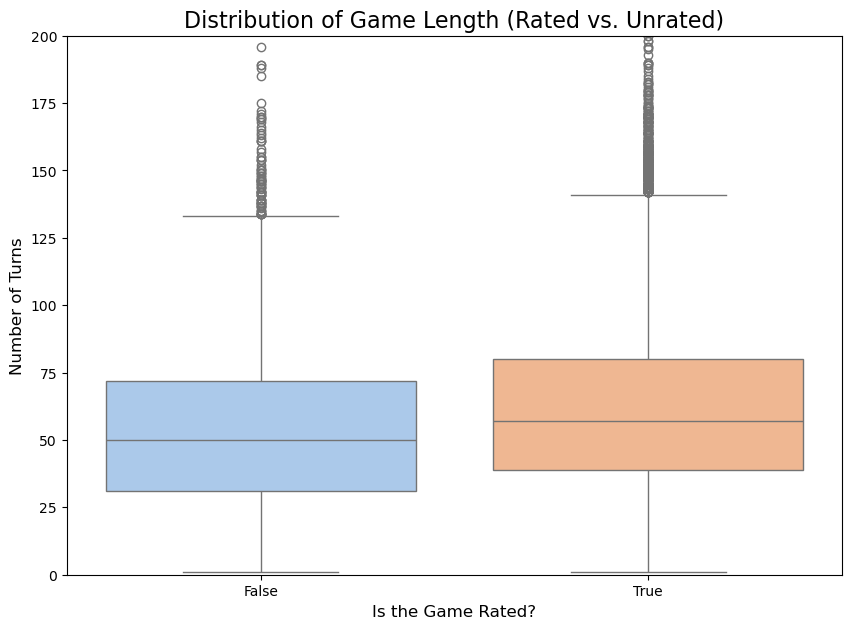

In [19]:
# Visualize the distributions with a box plot
plt.figure(figsize=(10, 7))
sns.boxplot(x='rated', y='turns', data=chessdb, palette='pastel')
plt.title('Distribution of Game Length (Rated vs. Unrated)', fontsize=16)
plt.xlabel('Is the Game Rated?', fontsize=12)
plt.ylabel('Number of Turns', fontsize=12)
# Limiting the y-axis makes the plot more readable by ignoring extreme outliers
plt.ylim(0, 200)
plt.show()

There is a clear difference in game duration based on whether the game is rated. Rated games last for an average of 61.96 turns, while unrated games are significantly shorter, averaging only 54.27 turns. In rated games, where a win or loss directly impacts a player's ELO rating, players are likely to be more careful, spend more time on their moves, and fight harder to salvage difficult positions, leading to longer, more drawn-out games. In unrated games, players might be more casual, experimental with their strategies, or more willing to resign early in a losing position, as there is no rating penalty.

Now, I will investigate the relationship between player skill and game length. To do this, I will create three rating 'tiers' and then use a box plot to visualize the distribution of turns for each tier

Average turns by player rating tier:
rating_tier
Both High (>2000)    72.83
Both Low (<1500)     55.16
Mixed / Mid-Rated    61.70
Name: turns, dtype: float64


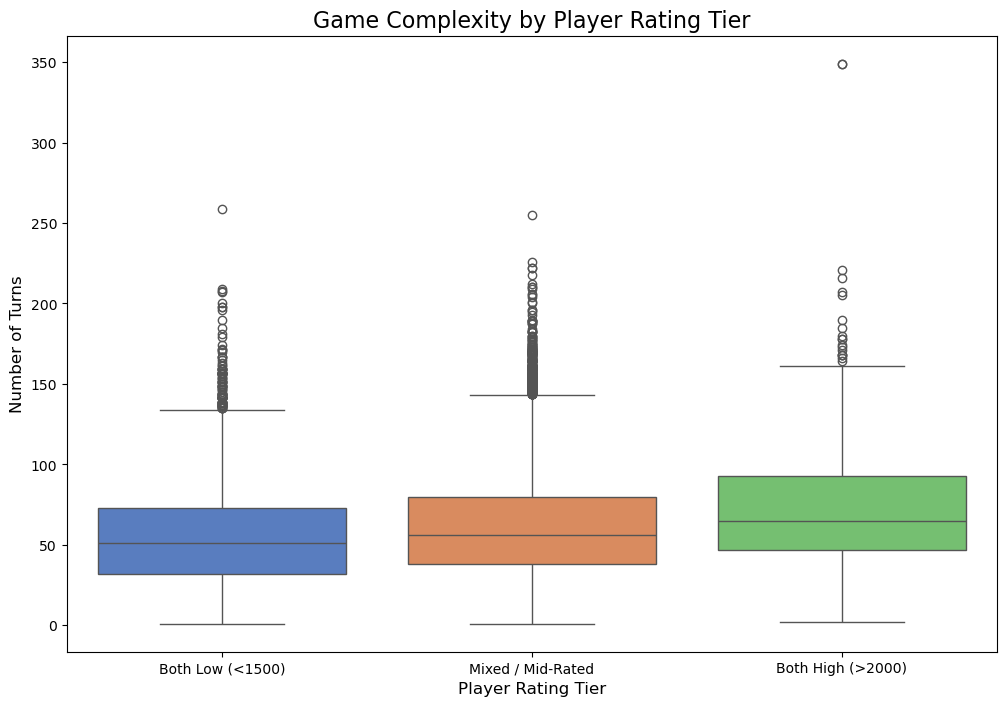

In [20]:
def get_rating_tier(row):
    if row['white_rating'] > 2000 and row['black_rating'] > 2000:
        return 'Both High (>2000)'
    elif row['white_rating'] < 1500 and row['black_rating'] < 1500:
        return 'Both Low (<1500)'
    else:
        return 'Mixed / Mid-Rated'

# Create the new 'rating_tier' column
chessdb['rating_tier'] = chessdb.apply(get_rating_tier, axis=1)

# Calculate and print the average turns for each tier
avg_turns_by_tier = chessdb.groupby('rating_tier')['turns'].mean()
print("Average turns by player rating tier:")
print(avg_turns_by_tier.round(2))

# Visualize the distributions as a box plot
plt.figure(figsize=(12, 8))
tier_order = ['Both Low (<1500)', 'Mixed / Mid-Rated', 'Both High (>2000)']
sns.boxplot(x='rating_tier', y='turns', data=chessdb, order=tier_order, palette='muted')
plt.title('Game Complexity by Player Rating Tier', fontsize=16)
plt.xlabel('Player Rating Tier', fontsize=12)
plt.ylabel('Number of Turns', fontsize=12)
plt.show()

Games between higher-rated players are, on average, longer and more complex than games between lower-rated players. A player's rating has a dramatic impact on game complexity. Games between two high-rated players are, on average, about 18 turns more than games between two low-rated players, demonstrating a clear shift from quick tactical battles to long strategic struggles as skill level increases.

In [21]:
output_path = 'cleaned_games.csv'
chessdb.to_csv(output_path, index=False)

print(f"\nSuccessfully saved the updated DataFrame to '{output_path}'")


Successfully saved the updated DataFrame to 'cleaned_games.csv'


In [22]:
chessdb.head()


,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply,ratingdiff,rating_tier
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,White,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5,309,Mixed / Mid-Rated
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,Black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4,61,Both Low (<1500)
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,White,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3,-4,Mixed / Mid-Rated
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,White,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3,-15,Both Low (<1500)
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,White,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5,54,Mixed / Mid-Rated


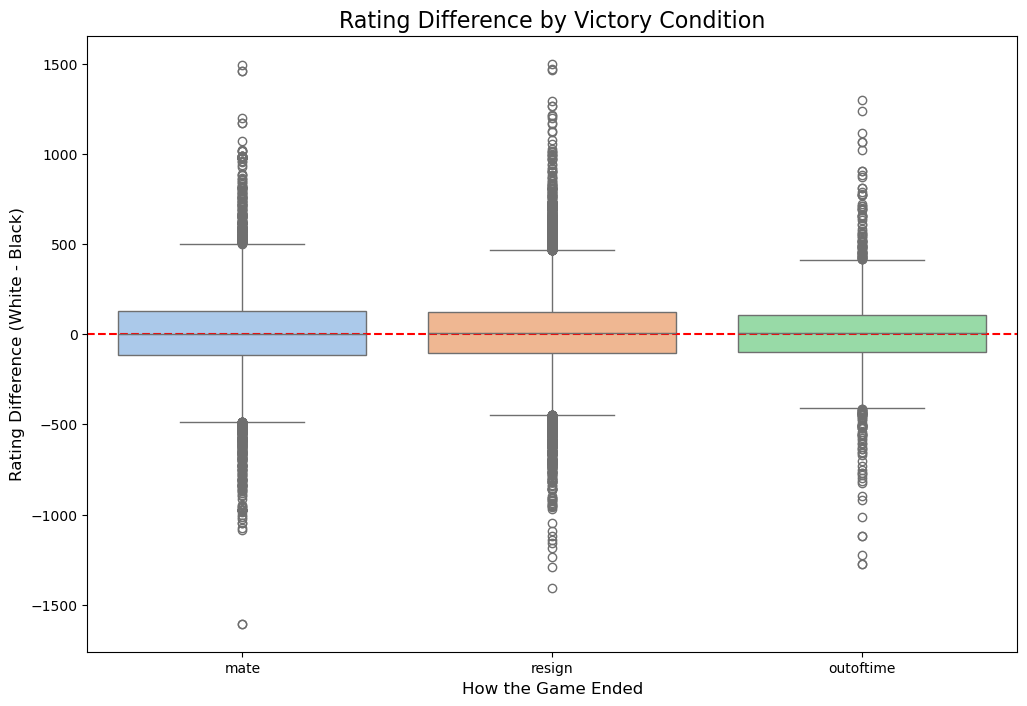

In [23]:
#Does the method of victory (e.g., checkmate, resign, lost-on-time) correlate with the players' rating difference?
plt.figure(figsize=(12, 8))
sns.boxplot(x='victory_status', y='ratingdiff', data=chessdb, order=['mate', 'resign', 'outoftime'], palette='pastel')
plt.axhline(0, color='red', linestyle='--')
plt.title('Rating Difference by Victory Condition', fontsize=16)
plt.xlabel('How the Game Ended', fontsize=12)
plt.ylabel('Rating Difference (White - Black)', fontsize=12)
plt.show()

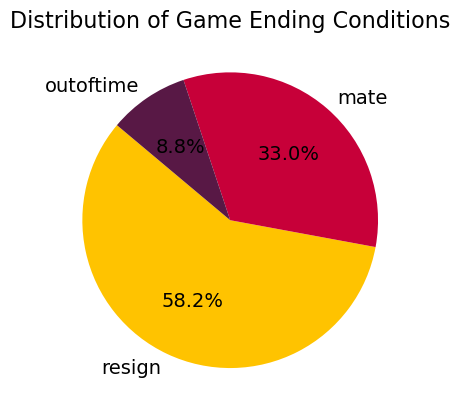

In [24]:
decisive_endings = chessdb[chessdb['victory_status'].isin(['mate', 'resign','outoftime'])]

# Calculate the percentage of each
ending_proportions = decisive_endings['victory_status'].value_counts(normalize=True) * 100

# Creating Pie Chart
colors = ['#FFC300', '#C70039', '#581845'] 
plt.pie(ending_proportions, labels=ending_proportions.index,autopct='%1.1f%%', startangle=140,textprops={'fontsize': 14}, colors=colors)
plt.title('Distribution of Game Ending Conditions', fontsize=16)
plt.show()

The majority of 'decisive games' end by resignation. 1 in 3 games play out until checkmate. Around 9% of the games end when one player loses on time.

## 5. Conclusion

This exploratory data analysis of over 20,000 chess games has revealed several key factors that influence the outcome of a game. By analyzing player ratings, opening choices, and game dynamics, we can draw a clear picture of what it takes to win at chess.

The primary findings from this project are:

A Slight but Significant First-Move Advantage: The data confirms the long-held belief that White has a small but statistically significant advantage. In decisive games, White wins approximately 52% of the time, and this result is not due to random chance.

Player Skill is the Overwhelming Predictor of Victory: While the first-move advantage is real, it is minor compared to the impact of player skill. The ELO rating difference between players is the most powerful predictor of the game's outcome. The higher-rated player wins the vast majority of the time, regardless of which color they play.

Strategic Choices Can Overcome Inherent Advantages: A player's opening strategy is critically important. A poor opening choice, such as the "Van't Kruijs Opening," can be so disadvantageous that it completely negates White's first-move advantage, leading to a higher win rate for Black. This highlights that a player's decisions can be more impactful than the game's inherent biases.

Game Complexity Increases with Skill: There is a strong correlation between player rating and game length. Games between two high-rated players (>2000 ELO) are, on average, over 30% longer than games between two low-rated players (<1500 ELO). This suggests that high-level chess involves fewer early mistakes and more prolonged, strategic endgames.

In summary, this analysis shows that winning a chess game is a combination of a small inherent advantage, the decisive factor of player skill, and the critical impact of strategic decision-making.